<a href="https://colab.research.google.com/github/HetviBhattasana/Digit_Recognizer/blob/main/Digit_Recognizer_(Training_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape) # the shape attribute return the dimension of array.
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Output : [4]


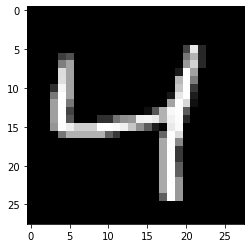

In [4]:
import matplotlib.pyplot as plt # matplotlib -  a collection of functions that make matplotlib work like MATLAB. it creates a plotting area.
i = 2
plt.imshow(x_train[i], cmap='gray')
print(f"Output : {[y_train[i]]}")
plt.show()

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# Normalization
# rescaling real-valued numeric attributes into a 0 to 1 range
x_train[0].max()

255

In [7]:
x_train[0].min()

0

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train[0].shape

(28, 28)

In [12]:
# Creating a Neural Network
import numpy as np
np.random.seed(23)
tf.random.set_seed(23)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape)) #  return a copy of the array collapsed into one dimension.
model.add(tf.keras.layers.Dense(300, activation='relu')) # the regular deeply connected neural network layer.
model.add(tf.keras.layers.Dropout(0.2)) #randomly sets input units to 0 with a frequency of rate at each step during training time
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(1568,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) # softmax is an output layer.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                15050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 251,060
Trainable params: 251,060
Non-trai

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3128 - accuracy: 0.9085
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1458 - accuracy: 0.9574
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1119 - accuracy: 0.9668
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944 - accuracy: 0.9722
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0812 - accuracy: 0.9758
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0641 - accuracy: 0.9799
Epoch 8/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 9/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.050

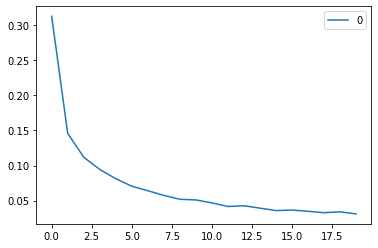

In [16]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()

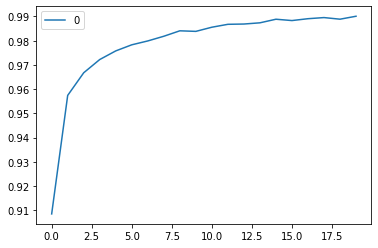

In [17]:
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [18]:
# evaluate on test data
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9834

In [21]:
confusion_matrix(y_test,y_pred)

array([[ 973,    1,    0,    0,    0,    0,    2,    2,    1,    1],
       [   0, 1127,    1,    1,    0,    2,    2,    0,    2,    0],
       [   1,    0, 1014,    0,    1,    0,    2,    8,    5,    1],
       [   0,    0,    4,  993,    0,    6,    0,    3,    3,    1],
       [   0,    0,    3,    0,  966,    0,    5,    0,    0,    8],
       [   1,    0,    0,    4,    0,  877,    4,    2,    3,    1],
       [   4,    2,    0,    1,    4,    2,  942,    0,    3,    0],
       [   0,    2,    7,    1,    0,    0,    0, 1010,    2,    6],
       [   3,    1,    2,    1,    2,    3,    1,    7,  950,    4],
       [   2,    3,    0,    6,   10,    2,    0,    3,    1,  982]])

In [22]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
model.save('digitrecognizer.hdf5')
# It saves NN Architecture and trainable parameters